## Example: 
Plot the Hilbert transformer for n = -10 ..10:

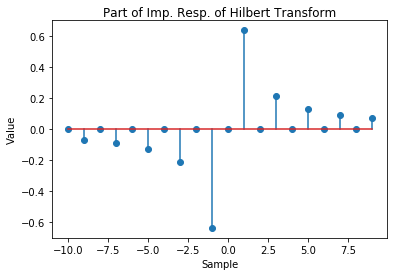

In [1]:
%matplotlib inline
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

h = np.zeros(20);
n = np.arange(-9, 10, 2);
h[n + 10] = 2/(np.pi * n)
plt.stem(np.arange(-10, 10), h)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Part of Imp. Resp. of Hilbert Transform')

Here we see that we have negative indices. If we want to obtain a causal system, we need to shif them to at or above zero using a suitable **delay**, hence the Hilbert transform involves some **delay**. Hence to make the imaginary and real part to fit to each other, we have to **delay the real part accordingly**.<br>

This type of complex signal, with a 1-sided spectrum, isalso called an **“analytc signal”**.

Let's take a look at the frequency response of our filter. Since we have included a delay, our phase should be 90 degrees ($\pi/2$ Rad) phase shift plus the linear phase from the delay. Hence our phase curve should hit the phase axis at frequency 0 at $\pi/2$ Rad, for which we would like to zoom in to this part $(\pi/2+Ω*d)$

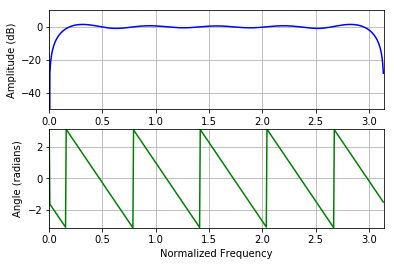

In [2]:
from freqz import freqz
freqz(h, axisFreqz = [0, np.pi, -50, 10], axisPhase=[0, np.pi, -np.pi, np.pi])

Here we can see that the phase curve indeed would hit the pi/2 Rad (90 degree) mark at the phase axis. We see that the magnitude plot only reaches about 0 dB atenuaton at about frequency 0.08pi and reaches higher atenuatons at frequencies below about 0.05pi and above about 0.95pi. Hence it is only a working Hilbert transformer within this frequency range.

If we want to plot the frequency response of our entire filter (not just the Hilbert transformer part), which passes only the positve frequencies, we frst need to construct our resultng complex filter, and then plot the frequency response on the whole frequency circle. First we need to create the correspondingly delayed unit impulse as the real part:

In [3]:
# construct a delayed impulse to implement the
# delay for the real part:
delt = np.zeros(20)
delt[9] = 1

#Then we need to add our imaginary part as our
#Hilbert transform to obtain our complex filter:
h = np.zeros(20);
n = np.arange(-9, 10+1, 2);
h[(n-1)+10] = 2./(np.pi*n);
hone = delt+h*1j
hone

array([ 0.-0.07073553j,  0.+0.j        ,  0.-0.09094568j,  0.+0.j        ,
        0.-0.12732395j,  0.+0.j        ,  0.-0.21220659j,  0.+0.j        ,
        0.-0.63661977j,  1.+0.j        ,  0.+0.63661977j,  0.+0.j        ,
        0.+0.21220659j,  0.+0.j        ,  0.+0.12732395j,  0.+0.j        ,
        0.+0.09094568j,  0.+0.j        ,  0.+0.07073553j,  0.+0.j        ])

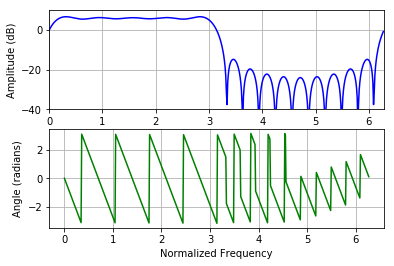

In [4]:
freqz(hone,1, whole=True, axisFreqz=[0,2*np.pi,-40,10])

Here we can see that we have indeed a **passband** at the **positve frequencies** between 0 and pi. Observe that the passband is at about 6dB above 0dB, because we multplied our filter by 2 to make it simpler. 

The negative frequencies appear between pi and 2pi on the frequency axis, and we can see that we get about -30 dB atenuaton there, which is not very much, but which we could increase it by making the filter longer. This also gives us a good indication of how well our filter is working!

The Python functon “remez” also has an opton for a Hilbert transform flter. We get a similar design with,

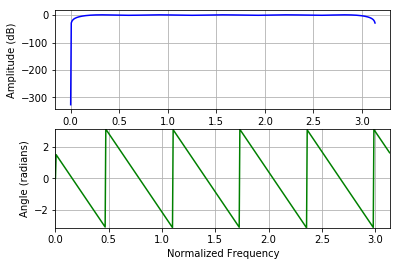

In [5]:
b=sp.remez(21, [0.03, 0.47], [1], type='hilbert')
freqz(b, axisPhase = [0, np.pi, -np.pi, np.pi])

Observe that the specifed passband does not go all the way to 0 and 0.5. The further away the passband is from these edges, the less ripples we will have in the passband, and the **more attenuaton** we will have for the **negative frequencies!**

But observe the equi-ripple behaviour in the passband, which is what we expect from remez.

Let's look at the whole frequency circle again, in iPython:

In [6]:
#Delay for the real part:
delt = np.zeros(21)
delt[10] = 1
#The complex filter:
honeremez = delt + 1j*b.conjugate()
honeremez

array([ 0. -8.35889141e-05j,  0. +7.28072838e-02j,  0. +7.11334936e-05j,
        0. +6.79343477e-02j,  0. -7.21513298e-06j,  0. +1.10111613e-01j,
        0. +2.67809302e-05j,  0. +2.01516354e-01j,  0. -8.96356182e-06j,
        0. +6.32971502e-01j,  1. +0.00000000e+00j,  0. -6.32971502e-01j,
        0. +8.96356182e-06j,  0. -2.01516354e-01j,  0. -2.67809302e-05j,
        0. -1.10111613e-01j,  0. +7.21513298e-06j,  0. -6.79343477e-02j,
        0. -7.11334936e-05j,  0. -7.28072838e-02j,  0. +8.35889141e-05j])

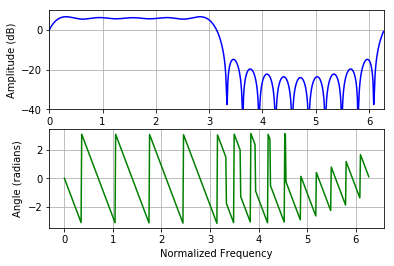

In [7]:
freqz(hone,1, whole=True, axisFreqz=[0, 6.28,-40,10])

Here we can see that we have again only about -30 dB attenuaton in the stopband for the negative frequencies. We obtain more practcal filters, if we change the corner frequencies to more above 0 and below 0.5 in remez.

### Example for the Measurement of the (Instantaneous) Amplitude:
We can now test our application example of measuring the Amplitude of a sinusoid with our Hilbert transform design. We saw that the lower end for the passband of our design is at normalized frequency of about 0.05. Hence we test a sinusoid of that frequency,

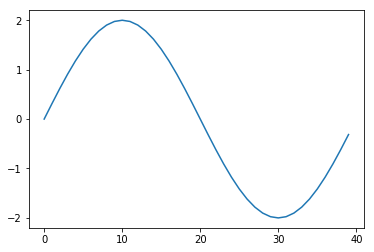

In [8]:
%matplotlib inline
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

x = 2 * np.sin(np.pi * 0.05 * np.arange(0, 40))
plt.plot(x)

Now we can flter it with our flter which passes only positve frequencies “hone”,

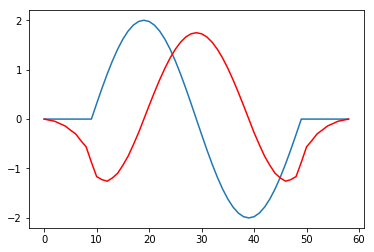

In [9]:
xhone = sp.convolve(x, hone)
plt.plot(np.real(xhone))
plt.plot(np.imag(xhone),'r')

Now we can compute the magnitude of this complex signal “xhone” to obtain the amplitude of our sinusoidal signal,

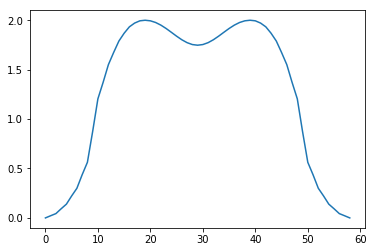

In [10]:
plt.plot(np.abs(xhone))

We see that between about sample 15 and 45 we obtain the amplitude of our sinusoidal signal with about 10% accuracy, which roughly corresponds to the -20dB attenuaton (corresponding to an atenuaton factor of 0.1) that our filter “hone” provides. This also hints at the fact that we can improve the magnitude estimaton by having a filter with a **higher attenuaton** at negative frequencies.